In [1]:
from skimage import io
import os
import matplotlib.pyplot as plt

from PIL import Image
from PIL.TiffTags import TAGS

import numpy as np

In [2]:
img_path = os.getcwd() + '/monocytes/'

# skimage
# io.use_plugin('pil')
# img_opt = io.imread(img_path + 'test.tif')
# img_mec = io.imread(img_path + 'test.tif')

In [3]:
# import tifffile
# tif = tifffile.TiffFile(img_path + 'test.tif')
# print(tif.imagej_metadata)
# dir (tif)

In [4]:
# img = Image.open(img_path + 'test.tif')
# meta_dict = {TAGS[key] : img.tag[key] for key in img.tag_v2}
# meta_dict

In [5]:
# Getting metadata

image = Image.open(img_path + 'topo_20220107_Exp2Cell8map-data-2022.01.07-16.34.34.510_processed-2022.01.10-12.38.51.tif')
exifdata = image.getexif()
for tag_id in exifdata:
    # get the tag name, instead of human unreadable tag id
    tag = TAGS.get(tag_id, tag_id)
    data = exifdata.get(tag_id)
    # decode bytes
    if isinstance(data, bytes):
        data = data.decode()
    print(f"{tag}: {data}")

    if tag == 'ImageWidth':
        im_w = data
    elif tag == 'ImageLength':
        im_h = data
    elif tag == 'XResolution':
        x_res = data
    elif tag == 'YResolution':
        y_res = data
    

ImageWidth: 64
ImageLength: 64
BitsPerSample: 32
Compression: 1
PhotometricInterpretation: 1
ResolutionUnit: 3
ImageDescription: no info
StripOffsets: 8
Software: asd2tiff_GUI - Arin Marchesi modified by FR
SampleFormat: 3
DateTime: 1 ms x frame       
SamplesPerPixel: 1
RowsPerStrip: 64
StripByteCounts: 16384
XResolution: 21333.396059127983
YResolution: 21333.396059127983
PlanarConfiguration: 1


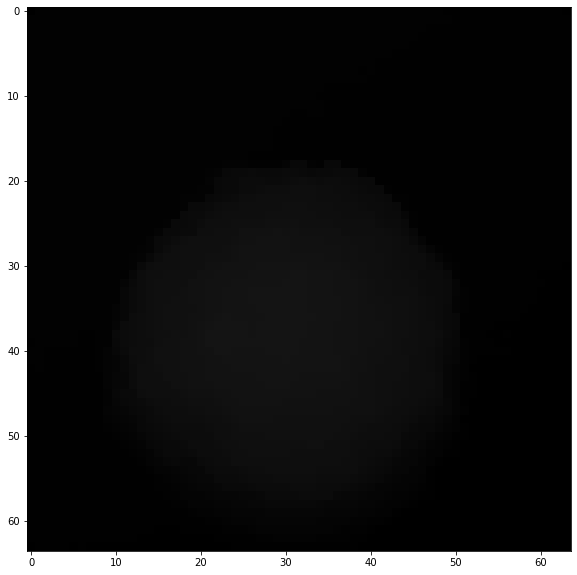

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(image, cmap='Greys_r')

In [7]:
image_np = np.asarray(image)

In [8]:
image_np

array([[0.342329, 2.98692 , 2.95859 , ..., 1.73538 , 1.70589 , 0.342329],
       [2.99006 , 2.99006 , 2.97806 , ..., 1.73538 , 1.70589 , 1.69833 ],
       [2.87624 , 2.98575 , 2.89555 , ..., 1.73538 , 1.70406 , 1.67172 ],
       ...,
       [1.20278 , 1.23391 , 1.20055 , ..., 0.05553 , 0.02684 , 0.12428 ],
       [1.14206 , 1.16397 , 1.14206 , ..., 0.02684 , 0.      , 0.      ],
       [0.342329, 1.09114 , 1.07646 , ..., 0.04462 , 0.02684 , 0.342329]],
      dtype=float32)

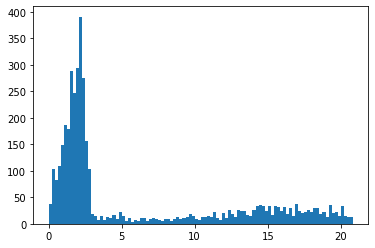

In [9]:
plt.hist(image_np.flatten(), 100);

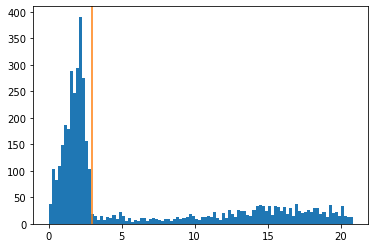

In [10]:
thr = 3 # based on the histogram
plt.hist(image_np.flatten(), 100);
plt.axvline(thr, c='C1')

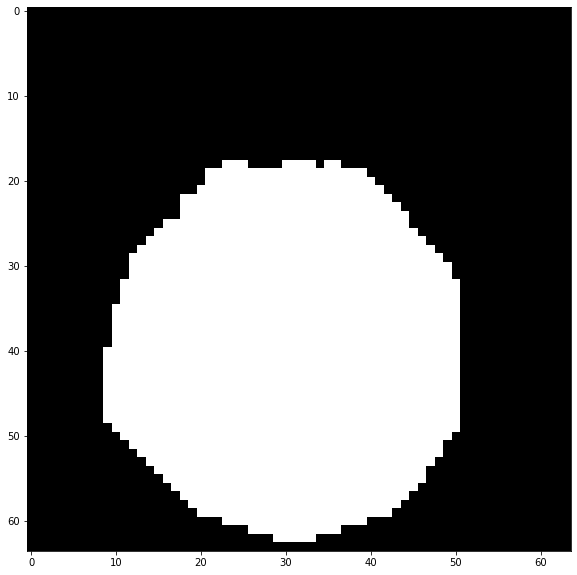

In [11]:
# segmentation
plt.figure(figsize=(10,10))
plt.imshow(image_np>thr, cmap='Greys_r')

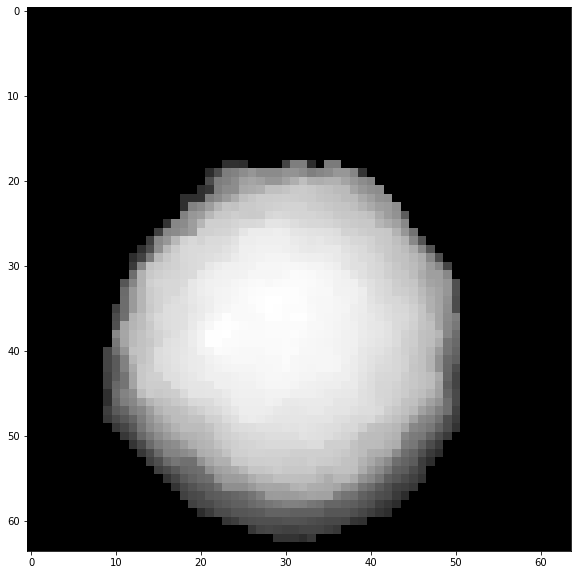

In [12]:
# extracting only the cell
image_np_ext = image_np.copy()
image_np_ext[image_np_ext<thr] = 0
plt.figure(figsize=(10,10))
plt.imshow(image_np_ext, cmap='Greys_r')

(array([102.,  88.,  71.,  95., 113., 174., 235., 228., 197., 176.]),
 array([ 3.01688,  4.7975 ,  6.57812,  8.35874, 10.13936, 11.91998,
        13.7006 , 15.48122, 17.26184, 19.04246, 20.82308], dtype=float32),
 <BarContainer object of 10 artists>)

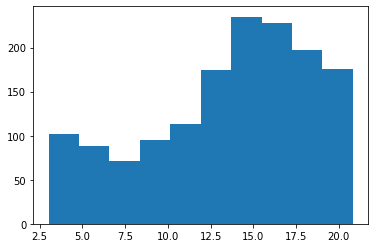

In [22]:
plt.hist(image_np_ext.flatten()[image_np_ext.flatten()!=0])

In [13]:
image = Image.open(img_path + '20220117_E2_Cell8BF.tif')

In [14]:
image_np = np.asarray(image)

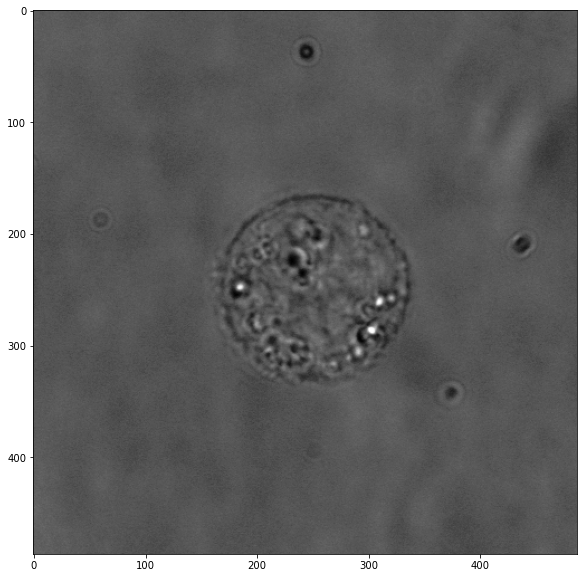

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(image, cmap='Greys_r')

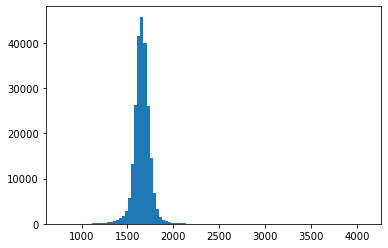

In [18]:
plt.hist(image_np.flatten(), 100);